## 1  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 파일 경로 설정
file_paths = [f"hipangle/hsm/{i:02}.csv" for i in range(1, 10)]
# 데이터 파일 로드
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# 불필요한 행 제거
for df in dfs:
    df.drop(df[df['Series0'] == "Series 0"].index, inplace=True)
    df.drop(df[df['Series0'].str.startswith("Main.Studies")].index, inplace=True)
    df.drop(df[df['Series0'].str.startswith("AXIS0")].index, inplace=True)

# 라디안 값을 도로 변환
for df in dfs:
    df['Unnamed: 1'] = df['Unnamed: 1'].astype(float) * (180 / np.pi)
    df['Series0'] = df['Series0'].astype(float)
    df['Series0'] = ((df['Series0'] - 49) / (51.2 - 50)) * 100

# x축 조정: 최소값을 50 위치에 오도록
target_position = 50
min_positions = [df['Unnamed: 1'].idxmin() for df in dfs]
for df, min_pos in zip(dfs, min_positions):
    shift_value = target_position - df.loc[min_pos, 'Series0']
    df['Series0'] += shift_value




# 데이터 플롯
font_size_all = 20
plt.figure(figsize=(10, 8))
for i, df in enumerate(dfs):
    plt.plot(df['Series0'], df['Unnamed: 1'], linewidth=2, label=f'Normalized Output{i+1}')
plt.tick_params(axis='x', labelsize=font_size_all) 
plt.tick_params(axis='y', labelsize=font_size_all)
plt.xlim(0, 100)
plt.xlabel('[Gait cycle %]', fontsize=font_size_all)
plt.ylabel(r'[$\theta$]', fontsize=font_size_all, rotation=0, labelpad=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()






FileNotFoundError: [Errno 2] No such file or directory: 'hipangle/hsm/01.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_paths = [f"hillcontact/{i:02}.csv" for i in range(1, 10)]
dfs = [pd.read_csv(file_path) for file_path in file_paths]

min_values = []
min_positions = []

for df in dfs:
    df.drop(df[df['Series0'] == "Series 0"].index, inplace=True)
    df.drop(df[df['Series0'].str.startswith("Main.Studies")].index, inplace=True)
    min_value = df['Unnamed: 1'].min()
    min_position = df[df['Unnamed: 1'] == min_value]['Series0'].values[0]
    min_values.append(min_value)
    min_positions.append(min_position)


dfs[0].head()
# df2.head()
font_size_all = 20

for df in dfs:
    df = df[df['Series0'] != 'AXIS0']
    df['Series0'] = df['Series0'].astype(float)
    df['Unnamed: 3'] = df['Unnamed: 3'].astype(float)
    df['Series0'] = (df['Series0'] - df['Series0'].min()) / (df['Series0'].max() - df['Series0'].min()) * 100
    plt.plot(df['Series0'], df['Unnamed: 3'], linewidth=2, label=f'Normalized Output {i+1}')


# plt.yticks(list(range(-1, 1, 0.1)))
plt.tick_params(axis='x', labelsize=font_size_all) 
plt.tick_params(axis='y', labelsize=font_size_all)
plt.xlim(0, 100)
plt.xlabel('[s]', fontsize=font_size_all)
plt.ylabel(r'[$\theta$]', fontsize=font_size_all, rotation=0, labelpad=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
# plt.legend(fontsize=font_size_all, loc='upper left', ncol=1, edgecolor='black')
plt.show()

min_values, min_positions


## hip flexion torque

In [ ]:
# 데이터 다시 불러오기
df1 = pd.read_csv('bpm_90/left/Hip_flexion/01.csv')
df2 = pd.read_csv('bpm_90/left/Hip_flexion/02.csv')
df3 = pd.read_csv('bpm_90/left/Hip_flexion/03.csv')
df4 = pd.read_csv('bpm_90/left/Hip_flexion/04.csv')

# Normalize and plot each dataframe
plt.figure(figsize=(10, 8))

dfs = [df1, df2, df3, df4]  # Add other dataframes to this list as needed

for i, df in enumerate(dfs, 4):

    df['AXIS0'] = (df['AXIS0'] - df['AXIS0'].min()) / (df['AXIS0'].max() - df['AXIS0'].min()) * 100

    plt.plot(df['AXIS0'], df['OUTPUT'], linewidth=3, label=f'Normalized Output {i}')

plt.tick_params(axis='x', labelsize=font_size_all) 
plt.tick_params(axis='y', labelsize=font_size_all)
plt.xlim(0, 100)
plt.xlabel('[s]', fontsize=font_size_all)
plt.ylabel('torque', fontsize=font_size_all, rotation=0, labelpad=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
# plt.legend(fontsize=font_size_all, loc='upper left', ncol=1, edgecolor='black')
plt.show()

In [ ]:
# 데이터 다시 불러오기
df1 = pd.read_csv('bpm_110/left/Hip_flexion/01.csv')
df2 = pd.read_csv('bpm_110/left/Hip_flexion/02.csv')
df3 = pd.read_csv('bpm_110/left/Hip_flexion/03.csv')
df4 = pd.read_csv('bpm_110/left/Hip_flexion/04.csv')

# Normalize and plot each dataframe
plt.figure(figsize=(10, 8))

dfs = [df1, df2, df3, df4]  # Add other dataframes to this list as needed

for i, df in enumerate(dfs, 4):

    df['AXIS0'] = (df['AXIS0'] - df['AXIS0'].min()) / (df['AXIS0'].max() - df['AXIS0'].min()) * 100

    plt.plot(df['AXIS0'], df['OUTPUT'], linewidth=3, label=f'Normalized Output {i}')

plt.tick_params(axis='x', labelsize=font_size_all) 
plt.tick_params(axis='y', labelsize=font_size_all)
plt.xlim(0, 100)
plt.xlabel('[s]', fontsize=font_size_all)
plt.ylabel('torque', fontsize=font_size_all, rotation=0, labelpad=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
# plt.legend(fontsize=font_size_all, loc='upper left', ncol=1, edgecolor='black')
plt.show()

In [ ]:
# 데이터 다시 불러오기
df1 = pd.read_csv('bpm_130/left/Hip_flexion/01.csv')
df2 = pd.read_csv('bpm_130/left/Hip_flexion/02.csv')
df3 = pd.read_csv('bpm_130/left/Hip_flexion/03.csv')
df4 = pd.read_csv('bpm_130/left/Hip_flexion/04.csv')

# Normalize and plot each dataframe
plt.figure(figsize=(10, 8))

dfs = [df1, df2, df3, df4]  # Add other dataframes to this list as needed

for i, df in enumerate(dfs, 4):

    df['AXIS0'] = (df['AXIS0'] - df['AXIS0'].min()) / (df['AXIS0'].max() - df['AXIS0'].min()) * 100

    plt.plot(df['AXIS0'], df['OUTPUT'], linewidth=3, label=f'Normalized Output {i}')

plt.tick_params(axis='x', labelsize=font_size_all) 
plt.tick_params(axis='y', labelsize=font_size_all)
plt.xlim(0, 100)
plt.xlabel('[s]', fontsize=font_size_all)
plt.ylabel('torque', fontsize=font_size_all, rotation=0, labelpad=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
# plt.legend(fontsize=font_size_all, loc='upper left', ncol=1, edgecolor='black')
plt.show()

## angle

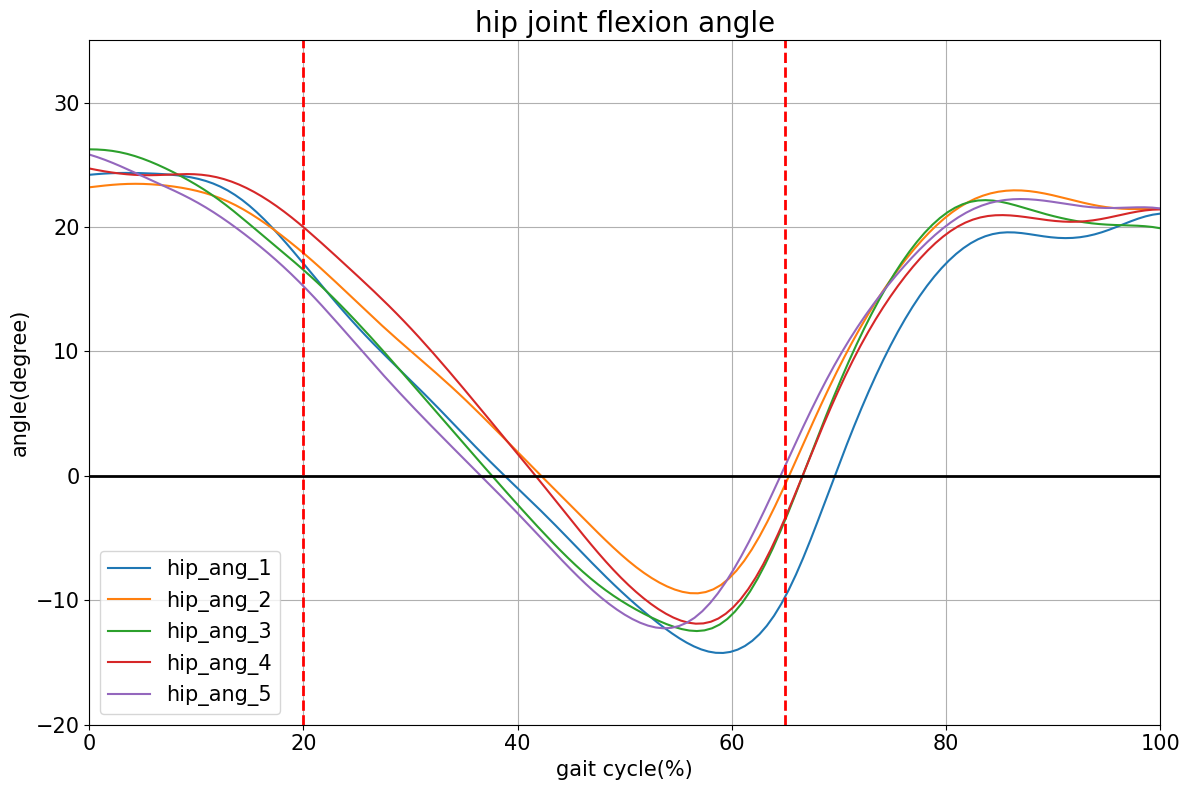

([[0.0], [59.184], [86.331]],
 [26.239802438800577, -14.23232161040672, 22.944420632700137])

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis


name = 'hsm'
b = '90'

hip_ang_1 = pd.read_csv(f'hipangle/{name}/bpm_{b}/01.csv')
hip_ang_2 = pd.read_csv(f'hipangle/{name}/bpm_{b}/02.csv')
hip_ang_3 = pd.read_csv(f'hipangle/{name}/bpm_{b}/03.csv')
hip_ang_4 = pd.read_csv(f'hipangle/{name}/bpm_{b}/04.csv')
hip_ang_5 = pd.read_csv(f'hipangle/{name}/bpm_{b}/05.csv')

gait_1 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_1.csv')
gait_2 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_2.csv')
gait_3 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_3.csv')
gait_4 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_4.csv')
gait_5 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_5.csv')


# Creating 10 datasets based on the given data
hip_ang_datasets = [hip_ang_1, hip_ang_2, hip_ang_3, hip_ang_4, hip_ang_5]
# hip_vel_datasets = [hip_vel_1]
gait_datasets = [gait_1, gait_2, gait_3, gait_4, gait_5]



for i in range(5):
    hip_ang_datasets[i] = hip_ang_datasets[i].drop([0, 1]).astype(float)
    # hip_vel_datasets[i] = hip_vel_datasets[i].drop([0, 1]).astype(float)
    gait_datasets[i] = gait_datasets[i].drop([0, 1]).astype(float)

# Lists to store the subsets of the data
subsets_hip_ang = []
subsets_hip_vel = []
subsets_gait = []

# Finding the subsets based on the gait datasets
for i in range(5):
    # Finding the transition points in the gait data
    transitions = (gait_datasets[i]['Unnamed: 1'].shift() < 1) & (gait_datasets[i]['Unnamed: 1'] >= 1)
    transition_indices = transitions[transitions].index.tolist()
    
    # Getting the subsets based on the transition points
    if len(transition_indices) >= 2:
        start, end = transition_indices[:2]
        subsets_gait.append(gait_datasets[i].iloc[start:end+1])
        subset_hip = hip_ang_datasets[i][(hip_ang_datasets[i]['Series0'] >= subsets_gait[-1]['Series0'].iloc[0]) & 
                                         (hip_ang_datasets[i]['Series0'] <= subsets_gait[-1]['Series0'].iloc[-1])]
        subsets_hip_ang.append(subset_hip)



# Normalize the 'Series0' values (x-values) for each subset to the range 0 to 100 without using sklearn
normalized_x_subsets_hip_ang_no_sklearn = []

for subset in subsets_hip_ang:
    # Manually normalize the x-values
    normalized_x = 100 * (subset['Series0'] - subset['Series0'].min()) / (subset['Series0'].max() - subset['Series0'].min())
    
    # Replace the original x-values with the normalized x-values in the subset
    subset_copy = subset.copy()
    subset_copy['Series0'] = normalized_x
    
    normalized_x_subsets_hip_ang_no_sklearn.append(subset_copy)


    degree_subsets_hip_ang = []
    

for subset in normalized_x_subsets_hip_ang_no_sklearn:
    # Convert radians to degrees
    degrees = np.degrees(subset['Unnamed: 1'].values)
    
    # Replace the original y-values with the degrees in the subset
    subset_copy = subset.copy()
    subset_copy['Unnamed: 1'] = degrees
    
    degree_subsets_hip_ang.append(subset_copy)

    # Lists to store max and min y-values for each interval across all subsets
max_values_0_20 = []
min_values_20_65 = []
max_values_65_100 = []

# Iterate over all the subsets to find the max and min y-values for each interval
for subset in degree_subsets_hip_ang:
    max_values_0_20.append(subset[(subset['Series0'] >= 0) & (subset['Series0'] <= 20)]['Unnamed: 1'].max())
    min_values_20_65.append(subset[(subset['Series0'] > 20) & (subset['Series0'] <= 65)]['Unnamed: 1'].min())
    max_values_65_100.append(subset[(subset['Series0'] > 65) & (subset['Series0'] <= 100)]['Unnamed: 1'].max())


peak_1 = max(max_values_0_20)
peak_2 = min(min_values_20_65)
peak_3 = max(max_values_65_100)



# List to store x-values corresponding to the peak_1 y-values across all subsets
x_peak_1_values = []

# Iterate over all the subsets to find the x-values corresponding to the peak_1 y-values
for subset in degree_subsets_hip_ang:
    # Find the row where 'Unnamed: 1' equals peak_1 in the interval 0-20
    row = subset[(subset['Series0'] >= 0) & (subset['Series0'] <= 20) & (subset['Unnamed: 1'] == peak_1)]
    if not row.empty:
        x_peak_1_values.append(row['Series0'].values[0])



# List to store x-values corresponding to the peak_1 y-values across all subsets
x_peak_2_values = []

# Iterate over all the subsets to find the x-values corresponding to the peak_1 y-values
for subset in degree_subsets_hip_ang:
    # Find the row where 'Unnamed: 1' equals peak_1 in the interval 0-20
    row = subset[(subset['Series0'] >= 20) & (subset['Series0'] <= 65) & (subset['Unnamed: 1'] == peak_2)]
    if not row.empty:
        x_peak_2_values.append(row['Series0'].values[0])



# List to store x-values corresponding to the peak_1 y-values across all subsets
x_peak_3_values = []

# Iterate over all the subsets to find the x-values corresponding to the peak_1 y-values
for subset in degree_subsets_hip_ang:
    # Find the row where 'Unnamed: 1' equals peak_1 in the interval 0-20
    row = subset[(subset['Series0'] >= 65) & (subset['Series0'] <= 100) & (subset['Unnamed: 1'] == peak_3)]
    if not row.empty:
        x_peak_3_values.append(row['Series0'].values[0])


# for idx, df in enumerate(degree_subsets_hip_ang, 1):
#         df.to_csv(f"processed_gait90_subset_{idx}.csv", index=False)

# Plotting the subsets with manually normalized x-values on a single figure
plt.figure(figsize=(12, 8))

for i, subset in enumerate(degree_subsets_hip_ang):
    plt.plot(subset['Series0'], subset['Unnamed: 1'], label=f'hip_ang_{i+1}')

plt.title('hip joint flexion angle', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('gait cycle(%)',fontsize = 15)
plt.ylabel('angle(degree)',fontsize = 15)
plt.hlines(0, 0, 100, colors='k', linestyles='-', linewidth=2)
plt.vlines(20,-20,35, colors='r', linestyles='--', linewidth=2)
plt.vlines(65,-20,35, colors='r', linestyles='--', linewidth=2)
plt.xlim(0, 100)
plt.ylim(-20, 35)
plt.legend(fontsize = 15)
plt.grid(True)
plt.tight_layout()
plt.show()

peak_1 = max(max_values_0_20)
peak_2 = min(min_values_20_65)
peak_3 = max(max_values_65_100)

values = [peak_1, peak_2, peak_3]
rounded_x_peak_1_values = [round(val, 3) for val in x_peak_1_values]
rounded_x_peak_2_values = [round(val, 3) for val in x_peak_2_values]
rounded_x_peak_3_values = [round(val, 3) for val in x_peak_3_values]
x_values = [rounded_x_peak_1_values, rounded_x_peak_2_values, rounded_x_peak_3_values]

x_values, values, 




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


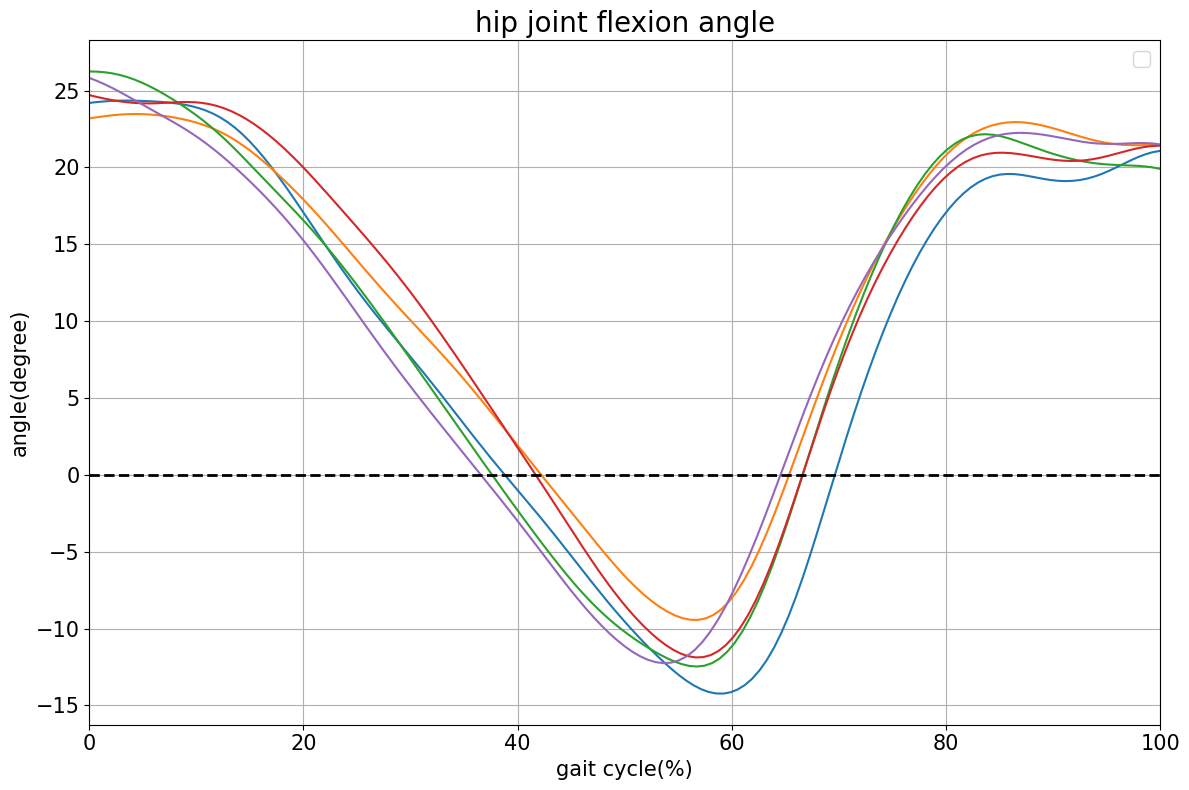

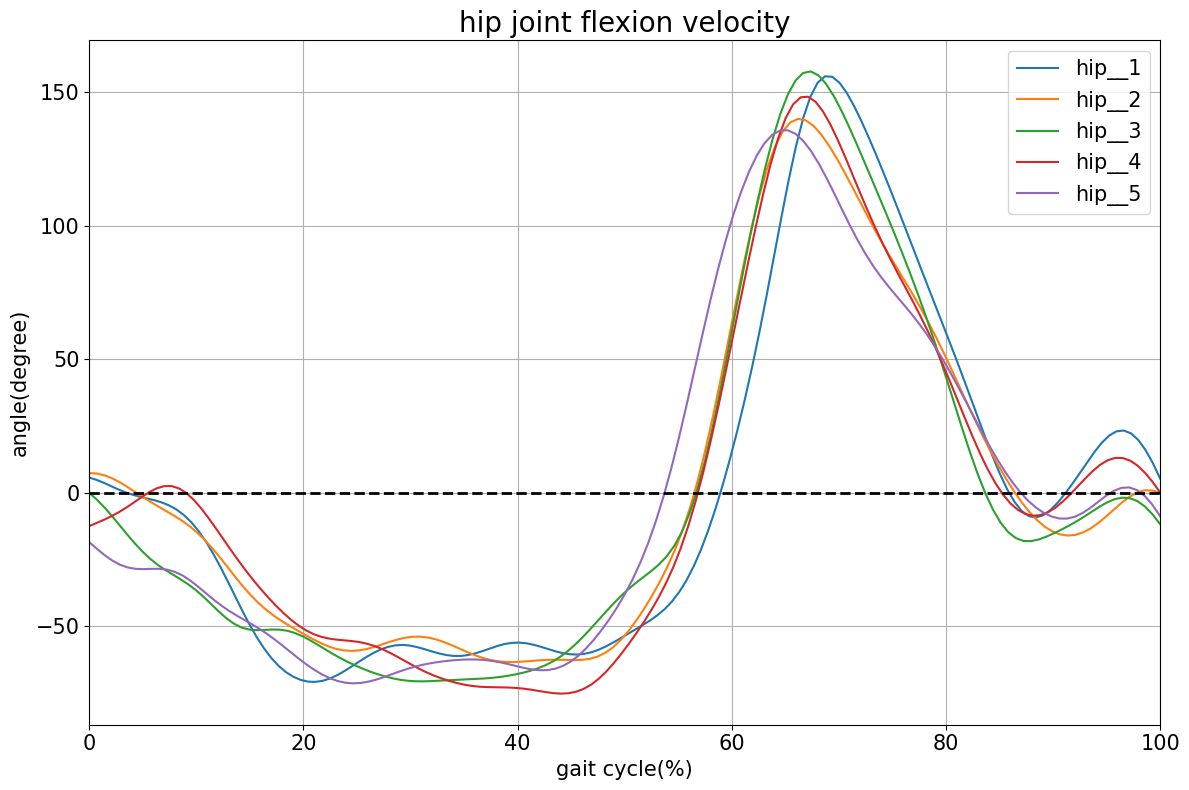

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

name = 'hsm'
b = '90'

hip_ang_1 = pd.read_csv(f'hipangle/{name}/bpm_{b}/01.csv')
hip_ang_2 = pd.read_csv(f'hipangle/{name}/bpm_{b}/02.csv')
hip_ang_3 = pd.read_csv(f'hipangle/{name}/bpm_{b}/03.csv')
hip_ang_4 = pd.read_csv(f'hipangle/{name}/bpm_{b}/04.csv')
hip_ang_5 = pd.read_csv(f'hipangle/{name}/bpm_{b}/05.csv')

hip_vel_1 = pd.read_csv(f'hipvel/{name}/bpm_{b}/01.csv')
hip_vel_2 = pd.read_csv(f'hipvel/{name}/bpm_{b}/02.csv')
hip_vel_3 = pd.read_csv(f'hipvel/{name}/bpm_{b}/03.csv')
hip_vel_4 = pd.read_csv(f'hipvel/{name}/bpm_{b}/04.csv')
hip_vel_5 = pd.read_csv(f'hipvel/{name}/bpm_{b}/05.csv')

gait_1 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_1.csv')
gait_2 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_2.csv')
gait_3 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_3.csv')
gait_4 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_4.csv')
gait_5 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_5.csv')







# Creating 10 datasets based on the given data
hip_ang_datasets = [hip_ang_1, hip_ang_2, hip_ang_3, hip_ang_4, hip_ang_5]
hip_vel_datasets = [hip_vel_1, hip_vel_2, hip_vel_3, hip_vel_4, hip_vel_5]
gait_datasets = [gait_1, gait_2, gait_3, gait_4, gait_5]

for i in range(5):
    hip_ang_datasets[i] = hip_ang_datasets[i].drop([0, 1]).astype(float)
    hip_vel_datasets[i] = hip_vel_datasets[i].drop([0, 1]).astype(float)
    gait_datasets[i] = gait_datasets[i].drop([0, 1]).astype(float)

# Lists to store the subsets of the data
subsets_hip_ang = []
subsets_hip_vel = []
subsets_gait = []

# Finding the subsets based on the gait datasets
for i in range(5):
    # Finding the transition points in the gait data
    transitions = (gait_datasets[i]['Unnamed: 1'].shift() < 1) & (gait_datasets[i]['Unnamed: 1'] >= 1)
    transition_indices = transitions[transitions].index.tolist()
    
    # Getting the subsets based on the transition points
    if len(transition_indices) >= 2:
        start, end = transition_indices[:2]
        subsets_gait.append(gait_datasets[i].iloc[start:end+1])
        subset_hip = hip_ang_datasets[i][(hip_ang_datasets[i]['Series0'] >= subsets_gait[-1]['Series0'].iloc[0]) & 
                                         (hip_ang_datasets[i]['Series0'] <= subsets_gait[-1]['Series0'].iloc[-1])]
        subsets_hip_ang.append(subset_hip)

    if len(transition_indices) >= 2:
        start, end = transition_indices[:2]
        subsets_gait.append(gait_datasets[i].iloc[start:end+1])
        subset_hip = hip_vel_datasets[i][(hip_vel_datasets[i]['Series0'] >= subsets_gait[-1]['Series0'].iloc[0]) & 
                                         (hip_vel_datasets[i]['Series0'] <= subsets_gait[-1]['Series0'].iloc[-1])]
        subsets_hip_vel.append(subset_hip)






# Normalize the 'Series0' values (x-values) for each subset to the range 0 to 100 without using sklearn
normalized_x_subsets_hip_ang_no_sklearn = []

for subset in subsets_hip_ang:
    # Manually normalize the x-values
    normalized_x = 100 * (subset['Series0'] - subset['Series0'].min()) / (subset['Series0'].max() - subset['Series0'].min())
    
    # Replace the original x-values with the normalized x-values in the subset
    subset_copy = subset.copy()
    subset_copy['Series0'] = normalized_x
    
    normalized_x_subsets_hip_ang_no_sklearn.append(subset_copy)


    degree_subsets_hip_ang = []

for subset in normalized_x_subsets_hip_ang_no_sklearn:
    # Convert radians to degrees
    degrees = np.degrees(subset['Unnamed: 1'].values)
    
    # Replace the original y-values with the degrees in the subset
    subset_copy = subset.copy()
    subset_copy['Unnamed: 1'] = degrees
    
    degree_subsets_hip_ang.append(subset_copy)


normalized_x_subsets_hip_vel_no_sklearn = []



for subset in subsets_hip_vel:
    # Manually normalize the x-values
    normalized_x = 100 * (subset['Series0'] - subset['Series0'].min()) / (subset['Series0'].max() - subset['Series0'].min())
    
    # Replace the original x-values with the normalized x-values in the subset
    subset_copy = subset.copy()
    subset_copy['Series0'] = normalized_x
    
    normalized_x_subsets_hip_vel_no_sklearn.append(subset_copy)

    degree_subsets_hip_vel = []

for subset in normalized_x_subsets_hip_vel_no_sklearn:
    # Convert radians to degrees
    degrees = np.degrees(subset['Unnamed: 1'].values)
    
    # Replace the original y-values with the degrees in the subset
    subset_copy = subset.copy()
    subset_copy['Unnamed: 1'] = degrees
    
    degree_subsets_hip_vel.append(subset_copy)


    for idx, df in enumerate(normalized_x_subsets_hip_vel_no_sklearn, 1):
        df.to_csv(f"processed_gait90_subset_{idx}.csv", index=False)


# Plotting the subsets with manually normalized x-values on a single figure
plt.figure(figsize=(12, 8))


for i, subset in enumerate(degree_subsets_hip_ang):
    plt.plot(subset['Series0'], subset['Unnamed: 1'])

plt.title('hip joint flexion angle', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('gait cycle(%)',fontsize = 15)
plt.ylabel('angle(degree)',fontsize = 15)
plt.hlines(0, 0, 100, colors='k', linestyles='--', linewidth=2)
plt.xlim(0, 100)
plt.legend(fontsize = 15)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the subsets with manually normalized x-values on a single figure
plt.figure(figsize=(12, 8))

for i, subset in enumerate(degree_subsets_hip_vel):
    plt.plot(subset['Series0'], subset['Unnamed: 1'], label=f'hip__{i+1}')

plt.title('hip joint flexion velocity', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('gait cycle(%)',fontsize = 15)
plt.ylabel('angle(degree)',fontsize = 15)
plt.hlines(0, 0, 100, colors='k', linestyles='--', linewidth=2)
plt.xlim(0, 100)
plt.legend(fontsize = 15)
plt.grid(True)
plt.tight_layout()
plt.show()




# for i, subset in enumerate(bpm_70):
#     axes[1].plot(subset['Series0'], subset['Unnamed: 1'], label=f'hip_ang_{i+1}', linestyle='-')
# axes[1].set_title('Subsets of hip_ang based on gait transition points',fontsize = 10)
# axes[1].hlines(0,2, 4, colors='k', linestyles='--', linewidth=2)
# axes[1].set_ylabel('Output Value')
# axes[1].legend(fontsize = 10)



# for i, subset in enumerate(bpm_90):
#     axes[2].plot(subset['Series0'], subset['Unnamed: 1'], label=f'hip_ang_{i+1}', linestyle='-')
# axes[2].set_title('Subsets of hip_ang based on gait transition points',fontsize = 10)
# axes[2].hlines(0,2, 4, colors='k', linestyles='--', linewidth=2)
# axes[2].set_ylabel('Output Value')
# axes[2].legend(fontsize = 10)







# Plotting all gait subsets on the second subplot
# for i, subset in enumerate(subsets_gait):
#     axes[3].plot(subset['Series0'], subset['Unnamed: 1'], label=f'gait_{i+1}', linestyle='--')
# axes[3].set_title('Subsets of gait between two transition points')
# axes[3].set_xlabel('Time')
# axes[3].set_ylabel('Output Value')
# axes[3].legend()
# # axes[2].grid(True)

# # Adjusting the layout
# plt.tight_layout()
# plt.show()

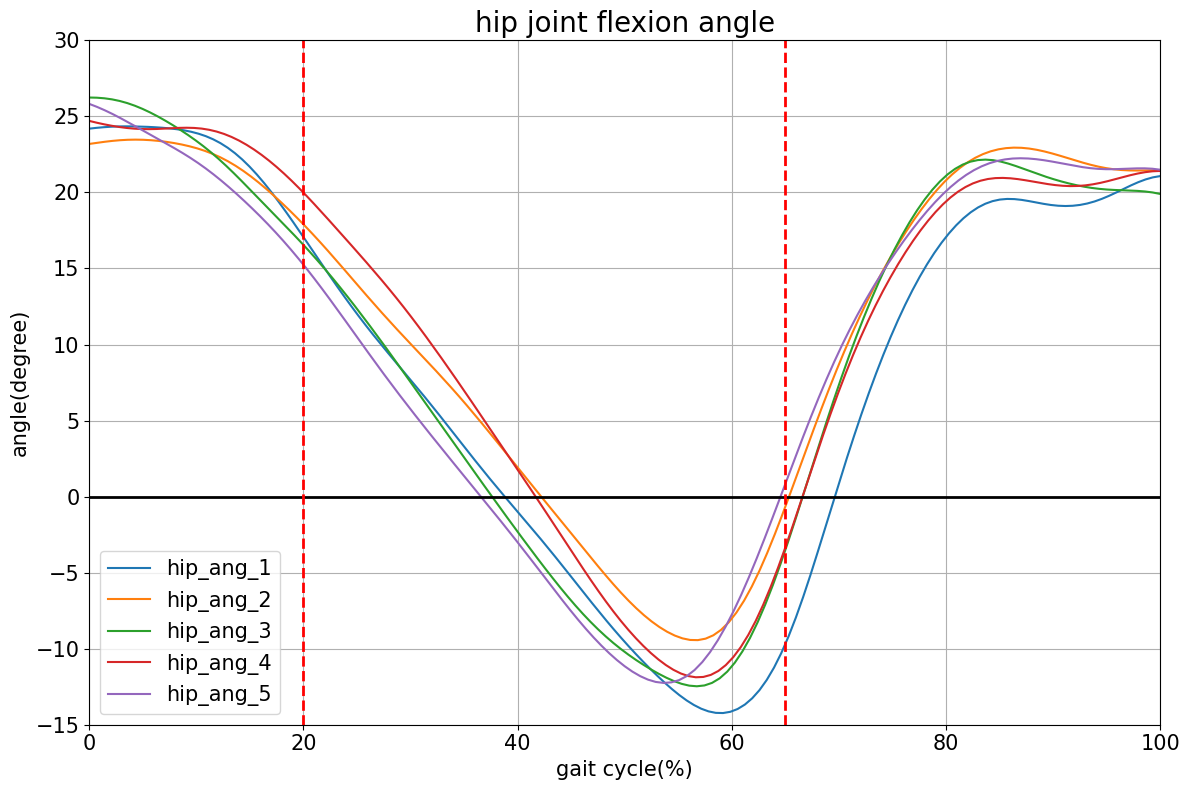

([[0.0], [59.184], [86.331]],
 [26.239802438800577, -14.23232161040672, 22.944420632700137])

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


name = 'hsm'
b = '90'

hip_ang_1 = pd.read_csv(f'hipangle/{name}/bpm_{b}/01.csv')
hip_ang_2 = pd.read_csv(f'hipangle/{name}/bpm_{b}/02.csv')
hip_ang_3 = pd.read_csv(f'hipangle/{name}/bpm_{b}/03.csv')
hip_ang_4 = pd.read_csv(f'hipangle/{name}/bpm_{b}/04.csv')
hip_ang_5 = pd.read_csv(f'hipangle/{name}/bpm_{b}/05.csv')

gait_1 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_1.csv')
gait_2 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_2.csv')
gait_3 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_3.csv')
gait_4 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_4.csv')
gait_5 =  pd.read_csv(f'grf/bpm_{b}/{name}/gait_5.csv')


# Creating 10 datasets based on the given data
hip_ang_datasets = [hip_ang_1, hip_ang_2, hip_ang_3, hip_ang_4, hip_ang_5]
# hip_vel_datasets = [hip_vel_1]
gait_datasets = [gait_1, gait_2, gait_3, gait_4, gait_5]


for i in range(5):
    hip_ang_datasets[i] = hip_ang_datasets[i].drop([0, 1]).astype(float)
    # hip_vel_datasets[i] = hip_vel_datasets[i].drop([0, 1]).astype(float)
    gait_datasets[i] = gait_datasets[i].drop([0, 1]).astype(float)

# Lists to store the subsets of the data
subsets_hip_ang = []
subsets_hip_vel = []
subsets_gait = []

# Finding the subsets based on the gait datasets
for i in range(5):
    # Finding the transition points in the gait data
    transitions = (gait_datasets[i]['Unnamed: 1'].shift() < 1) & (gait_datasets[i]['Unnamed: 1'] >= 1)
    transition_indices = transitions[transitions].index.tolist()
    
    # Getting the subsets based on the transition points
    if len(transition_indices) >= 2:
        start, end = transition_indices[:2]
        subsets_gait.append(gait_datasets[i].iloc[start:end+1])
        subset_hip = hip_ang_datasets[i][(hip_ang_datasets[i]['Series0'] >= subsets_gait[-1]['Series0'].iloc[0]) & 
                                         (hip_ang_datasets[i]['Series0'] <= subsets_gait[-1]['Series0'].iloc[-1])]
        subsets_hip_ang.append(subset_hip)



# Normalize the 'Series0' values (x-values) for each subset to the range 0 to 100 without using sklearn
normalized_x_subsets_hip_ang_no_sklearn = []

for subset in subsets_hip_ang:
    # Manually normalize the x-values
    normalized_x = 100 * (subset['Series0'] - subset['Series0'].min()) / (subset['Series0'].max() - subset['Series0'].min())
    
    # Replace the original x-values with the normalized x-values in the subset
    subset_copy = subset.copy()
    subset_copy['Series0'] = normalized_x
    
    normalized_x_subsets_hip_ang_no_sklearn.append(subset_copy)


    degree_subsets_hip_ang = []
    

for subset in normalized_x_subsets_hip_ang_no_sklearn:
    # Convert radians to degrees
    degrees = np.degrees(subset['Unnamed: 1'].values)
    
    # Replace the original y-values with the degrees in the subset
    subset_copy = subset.copy()
    subset_copy['Unnamed: 1'] = degrees
    
    degree_subsets_hip_ang.append(subset_copy)

    # Lists to store max and min y-values for each interval across all subsets
max_values_0_20 = []
min_values_20_65 = []
max_values_65_100 = []

# Iterate over all the subsets to find the max and min y-values for each interval
for subset in degree_subsets_hip_ang:
    max_values_0_20.append(subset[(subset['Series0'] >= 0) & (subset['Series0'] <= 20)]['Unnamed: 1'].max())
    min_values_20_65.append(subset[(subset['Series0'] > 20) & (subset['Series0'] <= 65)]['Unnamed: 1'].min())
    max_values_65_100.append(subset[(subset['Series0'] > 65) & (subset['Series0'] <= 100)]['Unnamed: 1'].max())

# List to store x-values corresponding to the peak_1 y-values across all subsets
x_peak_1_values = []

# Iterate over all the subsets to find the x-values corresponding to the peak_1 y-values
for subset in degree_subsets_hip_ang:
    # Find the row where 'Unnamed: 1' equals peak_1 in the interval 0-20
    row = subset[(subset['Series0'] >= 0) & (subset['Series0'] <= 20) & (subset['Unnamed: 1'] == peak_1)]
    if not row.empty:
        x_peak_1_values.append(row['Series0'].values[0])



# List to store x-values corresponding to the peak_1 y-values across all subsets
x_peak_2_values = []

# Iterate over all the subsets to find the x-values corresponding to the peak_1 y-values
for subset in degree_subsets_hip_ang:
    # Find the row where 'Unnamed: 1' equals peak_1 in the interval 0-20
    row = subset[(subset['Series0'] >= 20) & (subset['Series0'] <= 65) & (subset['Unnamed: 1'] == peak_2)]
    if not row.empty:
        x_peak_2_values.append(row['Series0'].values[0])



# List to store x-values corresponding to the peak_1 y-values across all subsets
x_peak_3_values = []

# Iterate over all the subsets to find the x-values corresponding to the peak_1 y-values
for subset in degree_subsets_hip_ang:
    # Find the row where 'Unnamed: 1' equals peak_1 in the interval 0-20
    row = subset[(subset['Series0'] >= 65) & (subset['Series0'] <= 100) & (subset['Unnamed: 1'] == peak_3)]
    if not row.empty:
        x_peak_3_values.append(row['Series0'].values[0])


# for idx, df in enumerate(degree_subsets_hip_ang, 1):
#         df.to_csv(f"processed_gait90_subset_{idx}.csv", index=False)

# Plotting the subsets with manually normalized x-values on a single figure
plt.figure(figsize=(12, 8))

for i, subset in enumerate(degree_subsets_hip_ang):
    plt.plot(subset['Series0'], subset['Unnamed: 1'], label=f'hip_ang_{i+1}')

plt.title('hip joint flexion angle', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('gait cycle(%)',fontsize = 15)
plt.ylabel('angle(degree)',fontsize = 15)
plt.hlines(0, 0, 100, colors='k', linestyles='-', linewidth=2)
plt.vlines(20,-15,30, colors='r', linestyles='--', linewidth=2)
plt.vlines(65,-15,30, colors='r', linestyles='--', linewidth=2)
plt.xlim(0, 100)
plt.ylim(-15, 30)
plt.legend(fontsize = 15)
plt.grid(True)
plt.tight_layout()
plt.show()

peak_1 = max(max_values_0_20)
peak_2 = min(min_values_20_65)
peak_3 = max(max_values_65_100)

values = [peak_1, peak_2, peak_3]
rounded_x_peak_1_values = [round(val, 3) for val in x_peak_1_values]
rounded_x_peak_2_values = [round(val, 3) for val in x_peak_2_values]
rounded_x_peak_3_values = [round(val, 3) for val in x_peak_3_values]
x_values = [rounded_x_peak_1_values, rounded_x_peak_2_values, rounded_x_peak_3_values]


x_values, values, 


